# Simulation Project - Team 31  - Dispatch Policy A

Rotem Levy 316381862 |
Zohar Feuer 208930297|
Guy Lifshitz 313328981


## imports

In [14]:
import numpy as np
import heapq as hq
import pandas as pd
from pylab import plot, show, bar
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import random

np.random.seed(0)

## Class

In [15]:
class Event():
    def __init__(self, event_time, event_type, area=-1, cell_size=-1):
        """
        an event has: time, type, relevant area, cell_size
        types: pack_arrival, dispatch, pickup, error_fix, customer_return, return_package
        """
        self.event_time = event_time
        self.event_type = event_type
        self.area = area
        
        hq.heappush(event_log, self)
    
    def __lt__(self, event2):
        return self.event_time < event2.event_time


##  Set up&Launch

In [16]:
#data:
s_space=[15,6,4] #cells for each size
pack_distribution=[[7,3,1],[8,2,1.5],[12,4,2],[5,1,3],[8,3,1],[3,1,1.5]] #order: [small,medium,large]
quarter_time=24*7*13 #13 weeks in hours.
quarters=50 #test 50 quarters

#measurments:
pack_dis_time_dics=[{},{},{},{},{},{}] #package dispatch time dictionary zone 
#pack_lc_amount_dic={} #amount of packages in storage in logistic center everyday
pack_lc_amount_dic=[{},{},{}] #amount of packages in storage in logistic center (small,med,large)

return_customers=0 #returning cusomers counter


## Simulation Run

In [17]:
for quarter in range(quarters):
    #qaurter setup
    lc_pack=[[[]for i in range(3)] for i in range(6)] #packages in logistic center, hold lc arrival day
    s_pack=[[0,0,0] for i in range(6)] #num of packages in each cell size in each zone
    error_zone=[0,0,0,0,0,0] #error indicator. 1=error.
    event_log=[]
    
    #launch first event of the quarter:
    curr_time=0
    Event(curr_time,'pack_arrival')
    event = hq.heappop(event_log)
    curr_time = event.event_time
  
    #DEBUG:print('-------------------------------------------quarter %s-------------------------------------------' %quarter)
    #DEBUG:print('pack_dis_time_dics at begining of quarter: %s' %pack_dis_time_dics)
    #DEBUG:print('pack_lc_amount_dic_small at begining of quarter: %s' %pack_lc_amount_dic[0])
    #DEBUG:print('pack_lc_amount_dic_med at begining of quarter: %s' %pack_lc_amount_dic[1])
    #DEBUG:print('pack_lc_amount_dic_large at begining of quarter: %s' %pack_lc_amount_dic[2])
    #DEBUG:print('return_customers at begining of quarter: %s' %return_customers)
    while curr_time<quarter_time:

        if event.event_type == 'pack_arrival':
            #DEBUGprint('-----------------day %s-----------------' %(curr_time/24))
            #DEBUG: print('pack arrival event is now occuring. day %s' %(int(curr_time/24)))

            for zone in range(6):
                x = int(np.random.poisson(pack_distribution[zone][0]))
                y = int(np.random.poisson(pack_distribution[zone][1]))
                z = int(np.random.poisson(pack_distribution[zone][2]))
                for i in range(x):
                    lc_pack[zone][0].append(int(curr_time/24))
                for i in range(y):
                    lc_pack[zone][1].append(int(curr_time/24))
                for i in range(z):
                    lc_pack[zone][2].append(int(curr_time/24))
                #DEBUG: print('zone %s: %s small, %s medium, %s large' %(zone,x,y,z))

            new_arrival_event=Event(curr_time+24, 'pack_arrival')
            #DEBUG: print('add to event log: %s %s' %(new_arrival_event.event_time, new_arrival_event.event_type))
            new_dispatch_event=Event(curr_time+6, 'dispatch')
            #DEBUG: print('add to event log: %s %s' %(new_dispatch_event.event_time, new_dispatch_event.event_type))

            #DEBUG: print('lc_pack at begining of day: %s' %lc_pack)
            #DEBUG: print('s_pack at begining of day: %s' %s_pack)

            
        elif event.event_type == 'dispatch': 
            #DEBUG:print('-----------------daily dispatch-----------------')
            #DEBUG: print('dispatch event is now occuring. day %s' %(int(curr_time/24)))

            #for each zone
            for i in range(6):
                #for each size
                for j in range(2,-1,-1):
                    for_dispatch=len(lc_pack[i][j]) #how many packages in lc for dispatch
                    cell_size=j
                    #DEBUG: print('for dispatch: zone %s, %s packages of size %s' %(i,for_dispatch,j))

                    #as long as there are packages to dispatch
                    while for_dispatch>0:
                        try:
                            #check available_cells
                            available_cells=s_space[cell_size]-s_pack[i][cell_size]
                            #DEBUG: print('available cells size %s: %s' %(cell_size,available_cells))
                        except IndexError:
                            #DEBUG: print('tried to look for cell_size %s' %cell_size)
                            break

                        #if there are available cells for dispatching
                        if available_cells>0:
                            #if a i can dispatch all
                            if available_cells>=for_dispatch:
                            #DEBUG: print('dispatch all packages. %s packages, size %s, cell size %s'%(for_dispatch,j,cell_size))
                            #DEBUG: print('l_pack for zone %s before dispatching:%s' %(i,lc_pack[i]))
                                for k in range(for_dispatch):
                                    #DEBUG: print('dipatch package %s' %k)
                                    lc_arrival_day=lc_pack[i][j][0]
                                    #DEBUG: print('lc_arrival_day:%s' %(lc_arrival_day))
                                    lc_pack[i][j]=lc_pack[i][j][1:]
                                    #DEBUG: print('updated_lc_pack:%s' %(lc_pack[i][j]))
                                    s_pack[i][cell_size]+=1
                                    #DEBUG: print('updated s_pack:%s' %(s_pack[i][cell_size]))
                                    key=int(curr_time/24)-lc_arrival_day
                                    #DEBUG: print('pack_dis_time_dics for zone %s package %s before dispatch: %s' %(i,k,pack_dis_time_dics[i]))
                                    if key in pack_dis_time_dics[i].keys():
                                        pack_dis_time_dics[i][key]+=1
                                        #DEBUG: print('insert pack to %s dic (add to key)' %i)
                                        #DEBUG: print('updated madad: %s' %pack_dis_time_dics[i])
                                    else:
                                        pack_dis_time_dics[i][key]=1
                                        #DEBUG: print('insert pack to %s dic (new key)' %i)
                                        #DEBUG: print('updated madad: %s' %pack_dis_time_dics[i])
                                    #DEBUG: print('pack_dis_time_dics for zone %s package %s after dispatch: %s' %(i,k,pack_dis_time_dics[i]))
                                    x=np.random.random(1)
                                    y=np.random.uniform(0,18)
                                    if 0<x<=0.4:
                                        new_event=Event(curr_time+y, 'pickup') 
                                    elif 0.4<x<=0.6:
                                        new_event=Event(curr_time+24+y, 'pickup')
                                    elif 0.6<x<=0.9:
                                        new_event=Event(curr_time+24*2+y, 'pickup')
                                    elif 0.9<x<=1:    
                                        new_event=Event(curr_time+24*3+y, 'pickup')
                                    new_event.area=i
                                    new_event.cell_size=cell_size
                                    for_dispatch-=1
                                    #DEBUG: print('add to event log: %s %s' %(new_event.event_time, new_event.event_type))

                            #if i cannot diaptch all, dispatch as many as i can (available cells)
                            else:
                            #DEBUG: print('dispatch part of packages. %s packages, package size %s, cell size %s'%(available_cells,j,cell_size))
                                for k in range(available_cells):
                                    lc_arrival_day=lc_pack[i][j][0]
                                    lc_pack[i][j]=lc_pack[i][j][1:]
                                    s_pack[i][cell_size]+=1
                                    key=int(curr_time/24)-lc_arrival_day
                                    if key in pack_dis_time_dics[i].keys():
                                        pack_dis_time_dics[i][key]+=1
                                    else:
                                        pack_dis_time_dics[i][key]=1
                                    x=np.random.random(1)
                                    y=np.random.uniform(0,18)
                                    if 0<x<=0.4:
                                        new_event=Event(curr_time+y, 'pickup')
                                    elif 0.4<x<=0.6:
                                        new_event=Event(curr_time+24+y, 'pickup')
                                    elif 0.6<x<=0.9:
                                        new_event=Event(curr_time+24*2+y, 'pickup')
                                    elif 0.9<x<=1:    
                                        new_event=Event(curr_time+24*3+y, 'pickup')
                                    new_event.area=i
                                    new_event.cell_size=cell_size
                                    for_dispatch-=1
                                    #DEBUG: print('add to event log: %s %s' %(new_event.event_time, new_event.event_type))

                                cell_size+=1

                        else: break

                            
            #number of packages from each size at logistic center at the end of dispatch
            lc_small=0
            lc_med=0
            lc_large=0
            for i in range(6):
                lc_small+=len(lc_pack[i][0])
                lc_med+=len(lc_pack[i][1])
                lc_large+=len(lc_pack[i][2])
                
            # small
            if lc_small in pack_lc_amount_dic[0].keys():
                pack_lc_amount_dic[0][lc_small]+=1
            else: pack_lc_amount_dic[0][lc_small]=1

            #med   
            if lc_med in pack_lc_amount_dic[1].keys():
                pack_lc_amount_dic[1][lc_med]+=1
            else: pack_lc_amount_dic[1][lc_med]=1

            #large    
            if lc_large in pack_lc_amount_dic[2].keys():
                pack_lc_amount_dic[2][lc_large]+=1
            else: pack_lc_amount_dic[2][lc_large]=1

            #pack_lc_amount_dic[(int(curr_time/24))]=[lc_small,lc_med,lc_large]

            #DEBUG: print('lc_pack after dispatch: %s' %lc_pack)
            #DEBUG: print('s_pack after dispatch: %s' %s_pack)
            #DEBUG:print('pack_lc_amount_dic_small after dispatch: %s' %pack_lc_amount_dic[0])
            #DEBUG:print('pack_lc_amount_dic_med after dispatch: %s' %pack_lc_amount_dic[1])
            #DEBUG:print('pack_lc_amount_dic_large after dispatch: %s' %pack_lc_amount_dic[2])
            #DEBUG: print('pack_dis_time_dics after dispatch: %s' %pack_dis_time_dics)


        elif event.event_type == 'pickup':        
            #DEBUG: print('pickup event is now occuring')
            if error_zone[event.area]==0:
                #DEBUG: print('machine is working')
                np.random.uniform(0,1)
                if x<=0.01:
                    #DEBUG: print('error during pickup from cell %s zone %s' %(event.cell_size,event.area))
                    error_zone[event.area]+=1
                    y=np.random.uniform(1,5)
                    new_event=Event(curr_time+y*24, 'error_fix')
                    new_event.area = event.area
                    #DEBUG:print('add to event log: %s %s' %(new_event.event_time, new_event.event_type))

                else:
                    #DEBUG: print('succesful pickup from cell %s zone %s' %(event.cell_size,event.area))
                    s_pack[event.area][event.cell_size]-=1

            else:
                #DEBUG: print('machine not working when pickup from cell %s zone %s' %(event.cell_size,event.area))
                return_customers+=1
                new_event=Event(curr_time+24, 'pickup')
                new_event.area=event.area
                new_event.cell_size=event.cell_size
                #DEBUG: print('add to event log: %s %s' %(new_event.event_time, new_event.event_type))



        elif event.event_type == 'error_fix':
            #DEBUG: print('error_fix zone %s' %event.area)
            error_zone[event.area]-=1



        event = hq.heappop(event_log)
        curr_time = event.event_time
        #DEBUG: print('the next event is: %s %s' %(event.event_time, event.event_type))
    
    
    #DEBUG: print('pack_dis_time_dics at end of quarter: %s' %pack_dis_time_dics)
    #DEBUG: print('pack_lc_amount_dic at end of quarter: %s' %pack_lc_amount_dic)
    #DEBUG: print('return_customers at end of quarter: %s' %return_customers)


## Show Results

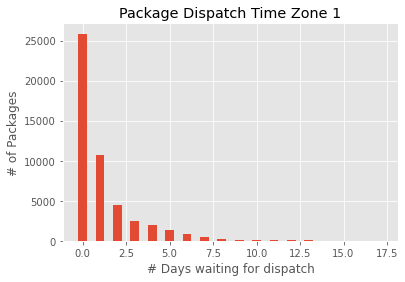

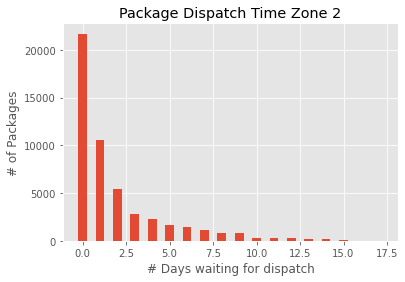

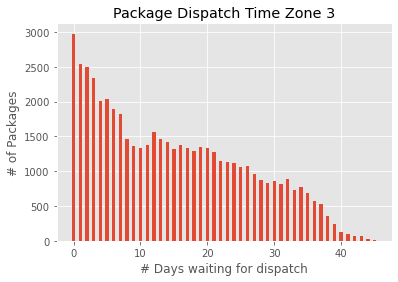

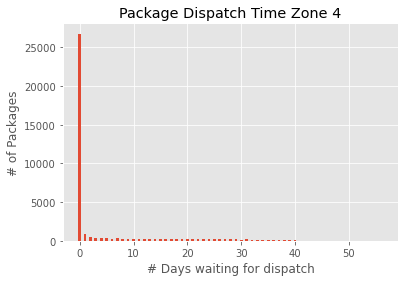

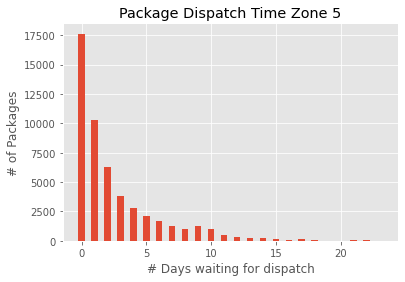

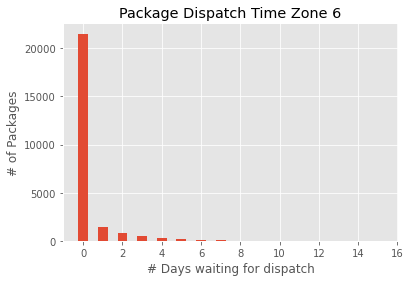

In [18]:
for i in range (6):
    #print(pack_dis_time_dics[i])
    fig = plt.figure()
    plt.bar(pack_dis_time_dics[i].keys(),pack_dis_time_dics[i].values(), width=0.5,align='center')
    plt.xlabel('# Days waiting for dispatch')
    plt.ylabel('# of Packages')
    plt.title('Package Dispatch Time Zone %s' %(i+1))
    plt.show()

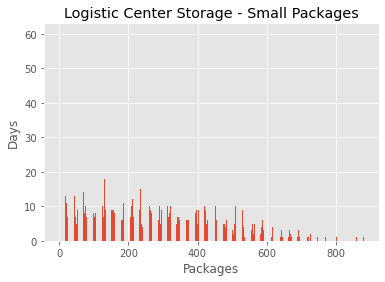

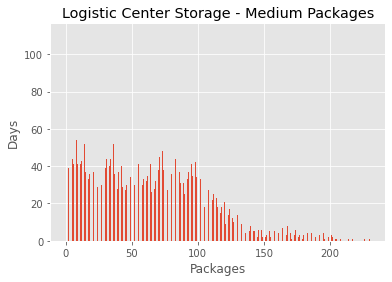

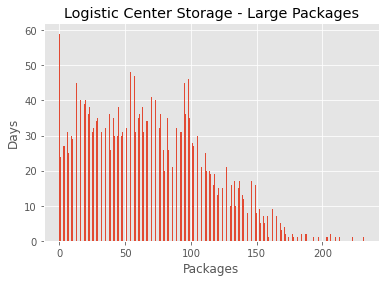

In [19]:
#print('small %s' %pack_lc_amount_dic[0])
fig = plt.figure()
plt.bar(pack_lc_amount_dic[0].keys(), pack_lc_amount_dic[0].values(), width=0.4)
plt.xlabel('Packages')
plt.ylabel('Days')
plt.title('Logistic Center Storage - Small Packages')
plt.show()

#print('med %s' %pack_lc_amount_dic[1])
fig = plt.figure()
plt.bar(pack_lc_amount_dic[1].keys(), pack_lc_amount_dic[1].values(), width=0.4)
plt.xlabel('Packages')
plt.ylabel('Days')
plt.title('Logistic Center Storage - Medium Packages')
plt.show()

#print('large %s' %pack_lc_amount_dic[2])
fig = plt.figure()
plt.bar(pack_lc_amount_dic[2].keys(), pack_lc_amount_dic[2].values(), width=0.4)
plt.xlabel('Packages')
plt.ylabel('Days')
plt.title('Logistic Center Storage - Large Packages')
plt.show()

In [20]:
print('return_customers for all quarters: %s' %return_customers)
print('return_customers for a quarter: %s' %(return_customers/50))

return_customers for all quarters: 14525
return_customers for a quarter: 290.5
